In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os

In [2]:
AUTOENCODER_PATH = "ImageSimilarity"
VER = 3
SIM_IMG_PATH = f"{AUTOENCODER_PATH}//similar_images{VER}.pickle"

In [3]:
# load frequencies of different proximity values that was found between all pairs of images
similar_images = pickle.loads(open(SIM_IMG_PATH, "rb").read())

In [4]:
# Let's explore the dataset that we've got
data = pd.read_csv('Dataset//app_data_processed.csv')

In [102]:
data.head()

,adSupported,androidVersion,appId,containsAds,description,free,headerImage,icon,minInstalls,offersIAP,...,genreId_PERSONALIZATION,genreId_PHOTOGRAPHY,genreId_PRODUCTIVITY,genreId_SHOPPING,genreId_SOCIAL,genreId_SPORTS,genreId_TOOLS,genreId_TRAVEL_AND_LOCAL,genreId_VIDEO_PLAYERS,genreId_WEATHER
0,1,403,AutomateIt.mainPackage,1,AutomateIt is designed to make your life easie...,1,https://lh3.googleusercontent.com/fmgYVgTZTl5M...,https://lh3.googleusercontent.com/AX5i8AxpkNAc...,1000000.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,403,AutomateItPro.mainPackage,0,AutomateIt is designed to make your life easie...,0,https://lh3.googleusercontent.com/vhbNdlnrhArN...,https://lh3.googleusercontent.com/2QBsyy6BPV3Q...,50000.0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,410,ChilliZET.app,1,Słuchaj Radia Chillizet i kanałów muzycznych w...,1,https://lh3.googleusercontent.com/sUEaJB9aJtVM...,https://lh3.googleusercontent.com/-l7k-c6zHbC0...,100000.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,440,Com.sktelecom.minit,1,SK텔레콤 고객이라면 새로워진 T world 서비스를 기존과 동일하게 3G/LTE ...,1,https://lh3.googleusercontent.com/UyjazHTfU-9k...,https://lh3.googleusercontent.com/xEZTcdyGLms1...,50000000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,410,DHQ.FileManagerForAndroid,0,DriveHQ Cloud File Manager can manage both loc...,1,https://lh3.googleusercontent.com/UwkPzGSZ0Xw9...,https://lh3.googleusercontent.com/gmR0kF1AT7Wd...,50000.0,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
similar_images

{0: [],
 1373: [],
 2746: [],
 4119: [],
 1: [],
 5492: [],
 1374: [],
 6865: [],
 2747: [],
 8238: [99508],
 4120: [],
 9611: [9599],
 10984: [],
 2: [],
 5493: [],
 12357: [],
 1375: [],
 6866: [],
 13730: [],
 2748: [],
 15103: [],
 9612: [],
 4121: [],
 8239: [8237],
 16476: [],
 10985: [],
 3: [],
 17849: [],
 5494: [],
 12358: [],
 19222: [],
 1376: [],
 6867: [],
 13731: [],
 20595: [],
 21968: [],
 2749: [],
 15104: [],
 23341: [],
 9613: [],
 16477: [],
 8240: [],
 4122: [],
 10986: [],
 24714: [],
 4: [],
 17850: [],
 5495: [],
 26087: [],
 19223: [],
 12359: [],
 1377: [],
 6868: [],
 13732: [],
 20596: [],
 21969: [],
 23342: [],
 15105: [],
 2750: [],
 9614: [],
 16478: [],
 4123: [],
 8241: [],
 10987: [],
 5: [],
 24715: [],
 17851: [],
 5496: [],
 26088: [],
 19224: [],
 12360: [],
 1378: [],
 6869: [],
 13733: [],
 20597: [],
 21970: [],
 23343: [],
 15106: [],
 2751: [],
 9615: [],
 16479: [],
 4124: [],
 8242: [],
 10988: [],
 24716: [],
 6: [],
 17852: [],
 5497: []

In [76]:
# Mean and standad deviation of whole dataset score
print(f"Mean: {np.mean(data['score'])}; Standard deviation: {np.std(data['score'])}")

Mean: 4.173811916801752; Standard deviation: 0.5487082717660123


In [120]:
# Let's filter out only big enough groups of similar icons
similar_groups = {}
keys = []
for k,v in similar_images.items():
    if len(v) > 10 and k not in keys:
        similar_groups[k] = v
        keys.extend(v)
        

In [121]:
len(similar_groups)

200

In [127]:
# Let's make a dataset with app score, mean app score from similar grop and standard deviation of the score for each group
score_sigma = {}
for k,v in similar_groups.items():
    scores = [data['score'][_i] for _i in v]
    score_sigma[k] = (np.round(data['score'][k],2), np.round(np.mean(scores),2), np.round(np.std(scores),4))
    
ss = pd.DataFrame(score_sigma.values(), index=score_sigma.keys(), columns=["score","mean","sigma"])
ss.sort_values(by='sigma')
        

,score,mean,sigma
41826,4.33,4.51,0.2038
25757,4.37,4.62,0.2270
71958,3.65,3.83,0.2341
5913,4.10,4.45,0.2430
87005,3.90,4.49,0.2487
...,...,...,...
71849,3.35,3.99,0.8175
83445,2.50,3.91,0.8404
83413,4.35,3.89,0.8678
83409,2.15,3.59,1.0213


In [128]:
# Percentage of apps in similar groups that have standard deviation lower than whole dataset standard deviation
ss[ss['sigma']<np.std(data['score'])]['sigma'].count() * 100/ ss['sigma'].count()

66.0

In [78]:
# We can see that there are more than 70% of groups tend to have less standard deviation than the whole dataset, 
# which suggests a correlation between the score and icon similarity

In [129]:
ss.reset_index(inplace=True)

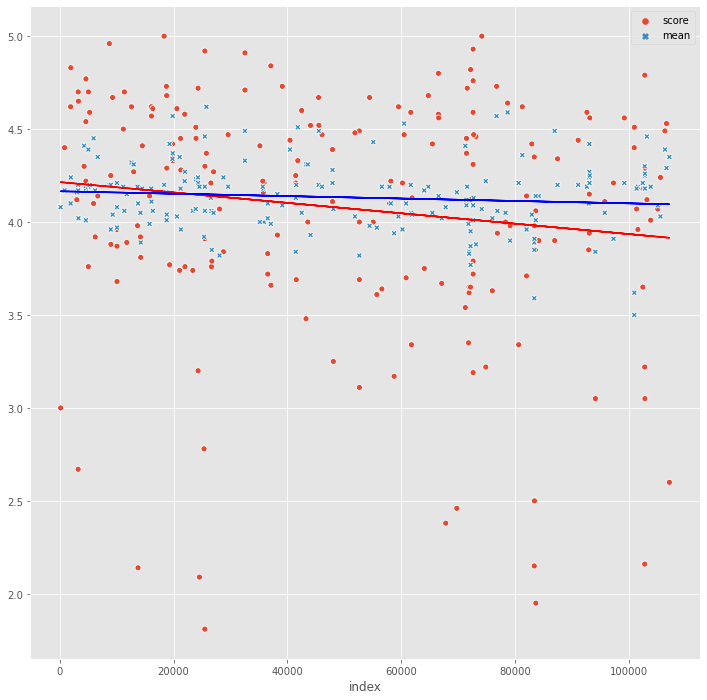

In [133]:
# Let's visualize it 
import seaborn as sns
from pylab import rcParams
from sklearn.linear_model import LinearRegression

rcParams['figure.figsize'] = 12,12
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,12))
g = sns.scatterplot(data=ss.set_index('index')[['score','mean']])

lr = LinearRegression()
X = ss['index'].to_frame(name='index')
y1 = ss['score']
lr.fit(X, y1)    
y_pred1 = lr.predict(X)
y2 = ss['mean']
lr.fit(X, y2)    
y_pred2 = lr.predict(X)

plt.plot(X, y_pred1, color='r')
plt.plot(X, y_pred2, color='b')
plt.show()


In [134]:
# As we can see, sample app score and average score from the similar apps are quite close to each other
# and 'share the same cloud' 